# Model Complexity and Overfitting
In this exercise, show that simpler models with fewer features may perform better on unseen data due to reduced risk of overfitting.

<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#poly_re">Task 1:  Re-use polynomial regression</a>
            </li>
            <li>
            <a href="#occam_train">Task 2: Train and evaluate linear models with po…</a>
            </li>
            <li>
            <a href="#plot_results">Task 3: Plot the polynomials (models)</a>
            </li>
            <li>
            <a href="#reflection">Task 4: Reflection</a>
            </li>
            <li>
            <a href="#Different_data_func">Task 5: Changing the data generating function</a>
            </li>
            <li>
            <a href="#reflection_failure">Task 6: Complex underlying true function</a>
            </li>
        </ul>
    </div>
</article>



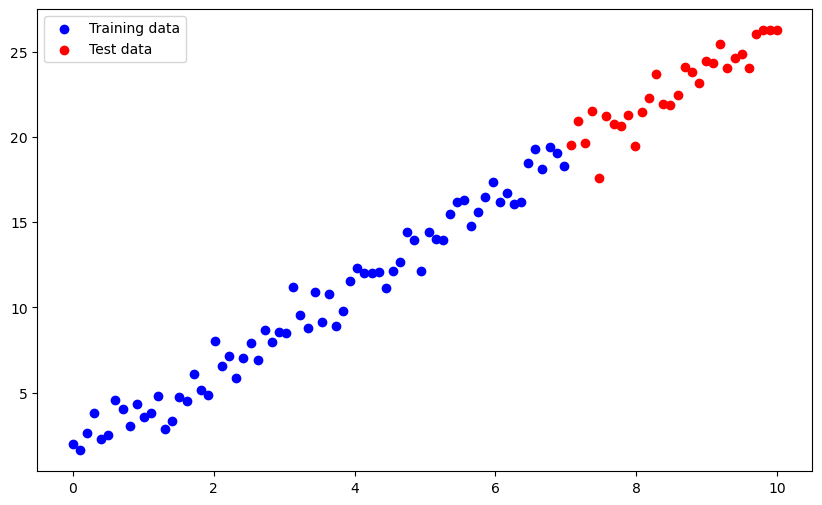

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y_true = 2.5 * X.ravel() + 1.5
noise = np.random.normal(0, 1, n_samples)
y = y_true + noise

# Split the data into training and test sets
split_index = int(0.7 * n_samples)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.legend()


---
**Task 1 (easy):  Re-use polynomial regression👩‍💻**
Insert/re-use the least square polynomial regression
 functions you implemented last week, in the cell below.

---

In [2]:
#### re-use / create desing matrix and polynomial regression functions
def create_design_matrix(X, degree):
    """
    Create a design matrix for polynomial regression.
    
    Parameters:
    - X: np.ndarray
        Input dataset (samples, 1).
    - degree: int
        Degree of the polynomial.
        
    Returns:
    - A: np.ndarray
        Design matrix with columns corresponding to X^0, X^1, ..., X^degree.
    """

    temp_array = []
    for x_row in X:
        x = x_row[0]
        ones = np.ones(degree + 1)
        
        for i in range(len(ones)):
            ones[i] = x ** i
        
        temp_array.append(ones)

    return np.array(temp_array)

def polynomial_regression(X, y, degree):
    """
    Compute the weights for polynomial regression using the least squares method.
    
    Parameters:
    - X: np.ndarray
        Input dataset (samples, 1).
    - y: np.ndarray
        Target values.
    - degree: int
        Degree of the polynomial.
        
    Returns:
    - w: np.ndarray
        Weights/coefficients for the polynomial regression.
    """

    design_matrix = create_design_matrix(X, degree)

    return np.linalg.inv((design_matrix.transpose() @ design_matrix)) @ design_matrix.transpose() @ y



---
**Task 2 (medium): Train and evaluate linear models with polynomial features👩‍💻**
1. Use the functions `polynomial_regression`
 and `create_design_matrix`
, to perform least square polynomial regression for each order in `degrees`
. 
2. Implement the function `compute_mse`
 that based on the predictions of a model and the ground truth targets return the _mean-squared-error_.


$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(f_{\mathbf{w}}(x_{i})-y_{i})^2$$
3. For each polynomial model calculate the _mean-squared-error_ (use `polynomial_regression`
, `create_design_matrix`
, and `compute_mse`
).


---

In [5]:
def compute_mse(y_true, y_pred):
    """Compute Mean Squared Error between true and predicted values."""
    
    return (1 / len(y_true)) * np.sum(((y_true - y_pred) ** 2))

# Train and evaluate linear models with different polynomial features
train_errors = []
test_errors = []
w_s = []

degrees = [1, 2, 3, 4, 5, 6]

#write code/solution here ...
for degree in degrees:
    design_matrix = create_design_matrix(X_train, degree)
    parameters = polynomial_regression(X_train, y_train, degree)

    w_s.append(parameters)
    
    y_train_pred = design_matrix @ parameters
    train_errors.append(compute_mse(y_train, y_train_pred))

    design_matrix = create_design_matrix(X_test, degree)
    
    y_test_pred = design_matrix @ parameters
    test_errors.append(compute_mse(y_test, y_test_pred))



---
**Task 3 (easy): Plot the polynomials (models)👩‍💻**
1. Plot the predictions of the polynomial models using `X`
 as input.
2. Make scatterplots with both the training and test data points (in different colors).


---

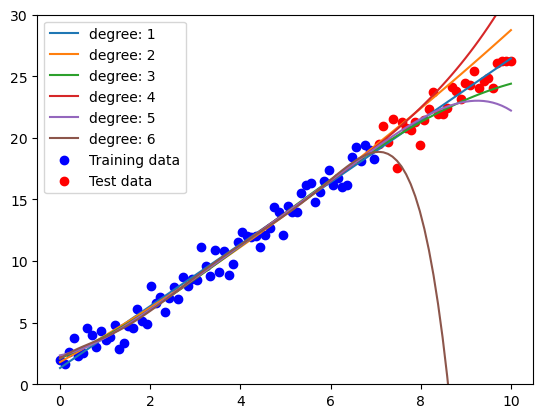

In [50]:
# Plot the results
# Insert code for question 1
for degree in degrees:
    # create_design_matrix(X, degree) @ w_s[degree - 1]
    plt.plot(X, create_design_matrix(X, degree) @ w_s[degree - 1], label=f'degree: {degree}')

# The following line keep axis fixed in a plot
plt.ylim(0,30)

# Insert code for question 2
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.legend()



---
**Task 4 (medium): Reflection💡**
Reflect upon the following questions:
1. Which model performed best on the training data?
2. Which model performed best on the test data?
3. How does the complexity (degree) of the model affect the performance on the training and test data?
4. Which model(s) shows signs of overfitting? How can you tell?


---

**4. Answers**
See below for all the numbers

**1**
Model with degree 6 is marginally better than any other degree

**2**
Model with degree 1 performed the best on the test data

**3**
It barely affected the training data, but it had a large impact on the test data

**4** 
All above degree 1 as an increase in training data fit doesn't also increase test data fit


Degree 1	 train error: 0.7970393254800734		 test error: 0.8570297099470393
Degree 2	 train error: 0.7470721956048514		 test error: 2.9252878267497353
Degree 3	 train error: 0.7308412739113657		 test error: 1.6085885216191664
Degree 4	 train error: 0.726476634907538		 test error: 7.980656957823829
Degree 5	 train error: 0.7258420850629106		 test error: 3.2270646719441705
Degree 6	 train error: 0.715264729813473		 test error: 3021.0110738478347


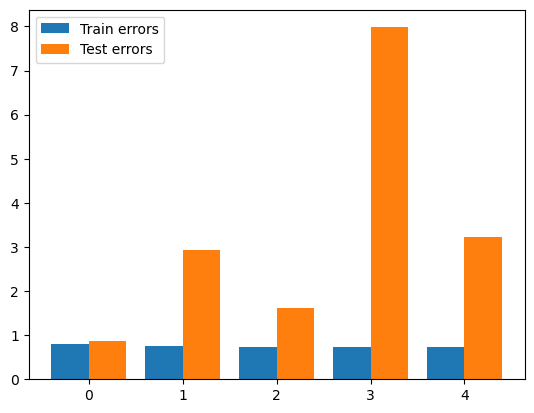

In [21]:
# Note the last degree (6) is removed as test errors was such large that no other observations could be made

for degree in degrees:
    print(f'Degree {degree}\t train error: {train_errors[degree - 1]}\t\t test error: {test_errors[degree - 1]}')

errors_x = np.arange(len(train_errors) - 1)
plt.bar(errors_x - 0.2, train_errors[:-1], 0.4, label='Train errors')
plt.bar(errors_x + 0.2, test_errors[:-1], 0.4, label='Test errors')
plt.legend()


---
**Task 5 (medium): Changing the data generating function👩‍💻💡**
How does the results change if the underlying function generating the data is changed to a 2. order polynomial? 
1. Re-generate the data by replacing `y_true`
 with $y=f(x)=x^2+1.5x-3$ in the data generation step, and rerun the other code blocks.
2. Does it still make sense to follow the strategy of Occam's razor?


---

**Answers 5**

**1**
Code is probably wrong

**2**
Though the code is wrong, the idea is still clear. A precise way of stating Occam's Razor is: choose the simplest, most correct model. In this task we were asked to compare the results to a second order polynomial, hence a degree of 2 should return the best model, but a degree of 2 is not the simplest model


Degree 1	 train error: 233.23285330295064		 test error: 3876.0462393949865
Degree 2	 train error: 231.61772173835718		 test error: 3702.2124843549095
Degree 3	 train error: 231.63395266006688		 test error: 3971.852131320047
Degree 4	 train error: 231.63831729871504		 test error: 3579.549486207248
Degree 5	 train error: 231.63895184093576		 test error: 4020.4792352650647
Degree 6	 train error: 231.64952910016365		 test error: 12500.697328776247


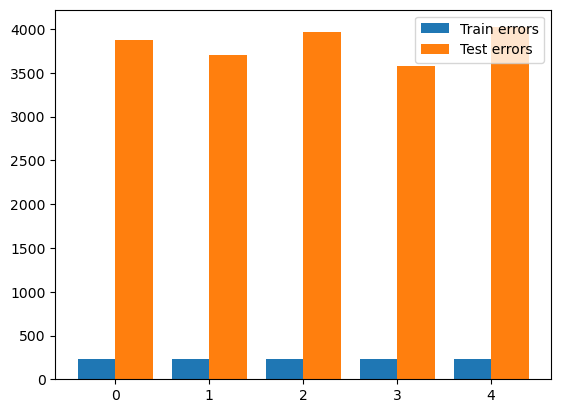

In [22]:
# Write reflection
def occams_razor(x_vector):
    result = []

    for x_row in x_vector:
        x = x_row[0]

        result.append(x ** 2 + 1.5 * x - 3)

    return np.array(result)

# Train and evaluate linear models with different polynomial features
train_errors = []
test_errors = []
w_s = []

degrees = [1, 2, 3, 4, 5, 6]

#write code/solution here ...
for degree in degrees:
    design_matrix = create_design_matrix(X_train, degree)
    parameters = polynomial_regression(X_train, y_train, degree)

    w_s.append(parameters)

    occams_razor_train = occams_razor(X_train)
    y_train_pred = design_matrix @ parameters
    train_errors.append(compute_mse(occams_razor_train, y_train_pred))

    design_matrix = create_design_matrix(X_test, degree)

    occams_razor_test = occams_razor(X_test)
    y_test_pred = design_matrix @ parameters
    test_errors.append(compute_mse(occams_razor_test, y_test_pred))

for degree in degrees:
    print(f'Degree {degree}\t train error: {train_errors[degree - 1]}\t\t test error: {test_errors[degree - 1]}')

errors_x = np.arange(len(train_errors) - 1)
plt.bar(errors_x - 0.2, train_errors[:-1], 0.4, label='Train errors')
plt.bar(errors_x + 0.2, test_errors[:-1], 0.4, label='Test errors')
plt.legend()


---
**Task 6 (hard): Complex underlying true function _(optional)_👩‍💻💡**
Repeat task 1-4 using the function: 

$$ f(x) = \sin(x^2) + 1.5 $$
as the data generating function, see code down below.
1. How do the polynomial models perform, compared to the generated data following a linear trend? 

2. How does the complexity of the model (in terms of the degree of the polynomial features) affect its performance on the training and test data?

3. Choose `np.sin`
-based kernels for the least squares fit instead. How do the models perform now? 

4. Reflect upon potential issues with using Occams's Razor for model selection in machine learning related tasks. 



---

In [ ]:
# Generate synthetic data sin
n_samples = 1000
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y_true =  np.sin(X.ravel()**2) + 1.5
noise = np.random.normal(0, .1, n_samples)
y = y_true + noise

... 
# repeat exercise here